# Linear Classification - Logistic Regression Model

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset into a Pandas dataframe
# data = pd.read_csv('.\\Dataset #2 - Classification\\Classification.csv')
data=pd.read_csv('fetal_health.csv')

data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)

# Split the dataset into features (X) and target (y)
X = data.drop('fetal_health', axis = 1)
Y = data['fetal_health']

# Split the data into training and testing sets
xtr, xts, ytr, yts = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
# Create a logistic regression model
model = LogisticRegression(penalty='l2', max_iter=3000, verbose=0)
# Train the model on the training data
model.fit(xtr, ytr)

LogisticRegression(max_iter=3000)

In [4]:
# Make predictions on the test data
predictions = model.predict(xts)

# Calculate the accuracy of the model
accuracy = accuracy_score(yts, predictions)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.960093896713615


In [5]:
# taking predictions on 10 test points
predictions_20 = model.predict(xts[:20])
print('  Actual labels:  {} \nPredicted labels: {}'.format(np.array(yts[:20]), predictions_20))

  Actual labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Predicted labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
predictions = model.predict(xts)
print("\nClassification Report: \n\n", classification_report(yts, predictions, zero_division=1))


Classification Report: 

               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       384
         1.0       0.84      0.74      0.78        42

    accuracy                           0.96       426
   macro avg       0.90      0.86      0.88       426
weighted avg       0.96      0.96      0.96       426



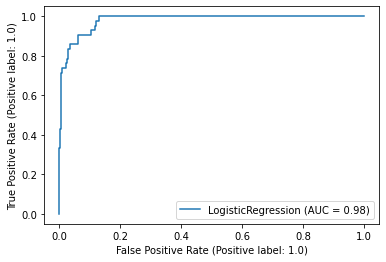

In [7]:
import matplotlib.pyplot as plt
from sklearn import  metrics
metrics.plot_roc_curve(model, xts, yts)
plt.show()

# Classification Trees - Basic Model

In [8]:
# Create a decision tree classifier
model_tree = DecisionTreeClassifier(splitter='best', max_depth=15)
# Split the data into training and testing sets
xtr, xts, ytr, yts = train_test_split(X, Y, test_size=0.2, random_state=0)
# Train the model on the training data
model_tree.fit(xtr, ytr)

DecisionTreeClassifier(max_depth=15)

In [9]:
# Make predictions on the test data
predictions = model_tree.predict(xts)

# Calculate the accuracy of the model
accuracy = accuracy_score(yts, predictions)

# Print the accuracy of the model
print("Accuracy: {:.2f} %".format(accuracy*100))

Accuracy: 98.12 %


In [10]:
predictions_20 = model_tree.predict(xts[:20])
print('  Actual labels:  {} \nPredicted labels: {}'.format(np.array(yts[:20]), predictions_20))

  Actual labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Predicted labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print("\nClassification Report: \n\n", classification_report(yts, predictions, zero_division=1))


Classification Report: 

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       384
         1.0       0.95      0.86      0.90        42

    accuracy                           0.98       426
   macro avg       0.97      0.93      0.94       426
weighted avg       0.98      0.98      0.98       426



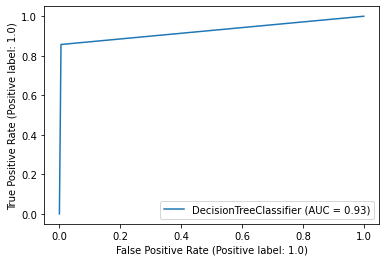

In [12]:
metrics.plot_roc_curve(model_tree, xts, yts)
plt.show()

# Classification Trees - "Random" Model

In [13]:
# Create Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
rfc.fit(xtr, ytr)

RandomForestClassifier(random_state=0)

In [14]:
# Make predictions on test data
y_pred = rfc.predict(xts)

# Evaluate the model performance
accuracy = accuracy_score(yts, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9906103286384976


In [15]:
print("\nClassification Report: \n\n", classification_report(yts, y_pred))


Classification Report: 

               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       384
         1.0       0.97      0.93      0.95        42

    accuracy                           0.99       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.99      0.99      0.99       426



In [16]:
y_pred = rfc.predict(xts[:20])
print('  Actual labels:  {} \nPredicted labels: {}'.format(np.array(yts[:20]), y_pred))

  Actual labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Predicted labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


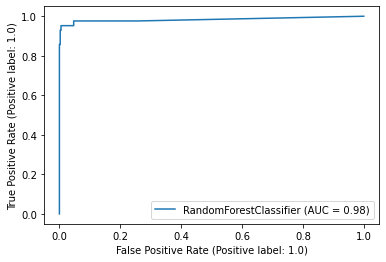

In [17]:
metrics.plot_roc_curve(rfc, xts, yts)
plt.show()